<font color="#CC3D3D"><p>
# Decision Tree based Ensemble Models

<img align='left' src="https://cdn-images-1.medium.com/max/1000/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width=700, height=500>

##### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.data.shape, data.target.mean()

((569, 30), 0.6274165202108963)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

In [4]:
hyperparam = {'n_estimators': 300, 'random_state': 0}

<font color="blue"><p>
### Bagging
<img align='left' src="http://drive.google.com/uc?export=view&id=1px4nXiYkoRZrPpnHlkYn0hWfGih9SHpB" width=650, height=500>

In [5]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(**hyperparam)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.9790209790209791

<font color="blue"><p>
### Random Forest (RF)
<img align='left' src="https://c.mql5.com/2/33/image1__1.png">

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**hyperparam)
rf.fit(X_train, y_train).score(X_test, y_test)

0.972027972027972

<font color="blue"><p>
### AdaBoost (Adaptive Boosting)  
<img align='left' src="https://miro.medium.com/max/850/1*DwvwMlOcT1T9hZwIJvMfng.png" width=800, height=600>
<img align='left' src='http://drive.google.com/uc?export=view&id=1sg3cRbLb-6c8RFNYyzYX32TIO8vXKoLZ' width=650, height=400>

In [7]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(**hyperparam)
ada.fit(X_train, y_train).score(X_test, y_test)

0.9790209790209791

<font color="blue"><p>
### Gradient Boosting (GBM) #####   
<br/><img src="https://explained.ai/gradient-boosting/images/golf-dir-vector.png" width=800, height=600>   
<img src='http://drive.google.com/uc?export=view&id=1IPejYVq077Z1HZLkl3_DpSgtjwXzcGAf' width=550, height=400>

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(**hyperparam)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

<font color="blue"><p>
### eXtreme Gradient Boosting (XGBoost) #####   
<img align='left' src='https://dzone.com/storage/temp/13069535-xgboost-features.png'>

**XGBoost**의 성능에 가장 큰 영향을 미치는 하이퍼파라미터는 다음과 같다:

| 파라미터 이름 | 파라미터 유형 | 권장 범위 |
|---|:---:|---:|
|**reg_alpha**|Continuous|**0 ~ 1000**|
|colsample_bytree|Continuous|0.5 ~ 1|
|**learning_rate**|Continuous|**0.1 ~ 0.5**|
|gamma|Continuous|0 ~ 5|
|reg_lambda|Continuous|0 ~ 1000|
|max_depth|Integer|0 ~ 10|
|**min_child_weight**|Continuous|**0 ~ 120**|
|**num_round**|Continuous|**1 ~ 4000**|
|**subsample**|Continuous|**0.5 ~ 1**|

In [9]:
from xgboost import XGBClassifier

xgb =  XGBClassifier(**hyperparam)
xgb.fit(X_train, y_train).score(X_test, y_test)

0.986013986013986

### Performance Comparison Between Ensemble Models

                    CV Mean       Std
Bagging            0.943721  0.013359
RandomForest       0.950698  0.018838
AdaBoost           0.964733  0.024704
Gradient Boosting  0.964733  0.021076
XGBoost            0.960082  0.012031


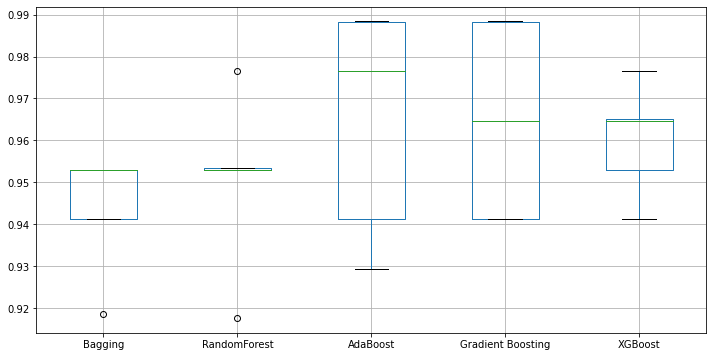

In [10]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

kfold = KFold(n_splits=5, random_state=0) # k=5, split the data into 5 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Bagging', 'RandomForest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
models = [bagging, rf, ada, gbm, xgb]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std}, index=classifiers) 
print(models_dataframe)
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()
plt.show()

<font color="#CC3D3D"><p>
# End